In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving heloc_train.csv to heloc_train.csv


In [ ]:
from google.colab import files

uploaded2 = files.upload()

Saving heloc_test.csv to heloc_test.csv


In [ ]:
import pandas as pd
import io

heloc_train = pd.read_csv(io.BytesIO(uploaded['heloc_train.csv']))
print(heloc_train)

     RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0                Bad                    69                    148   
1                Bad                    77                    229   
2                Bad                    58                     46   
3                Bad                    -9                     -9   
4                Bad                    80                    226   
...              ...                   ...                    ...   
9408             Bad                    65                    115   
9409             Bad                    77                    437   
9410            Good                    75                    140   
9411             Bad                    64                     92   
9412             Bad                    -9                     -9   

      MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                             4              66                     41   
1                      

In [ ]:
heloc_test = pd.read_csv(io.BytesIO(uploaded2['heloc_test.csv']))
print(heloc_test)

      ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
0                       81                    333                         27   
1                       59                    137                         11   
2                       61                     79                          4   
3                       -9                     -9                         -9   
4                       -9                     -9                         -9   
...                    ...                    ...                        ...   
1041                    87                    296                         26   
1042                    -9                     -9                         -9   
1043                    75                    162                          8   
1044                    71                    155                          1   
1045                    75                    171                          2   

      AverageMInFile  NumSatisfactoryTr

In [ ]:
df= pd.DataFrame(heloc_train)

In [ ]:
df_encoded = pd.get_dummies(df, columns=['RiskPerformance'], drop_first=True)

In [ ]:
df_encoded["RiskPerformance_Good"] = df_encoded["RiskPerformance_Good"].astype(int)

Scaling and PCA

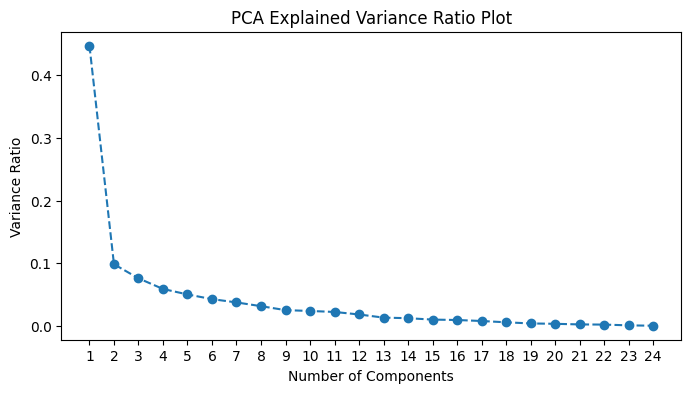

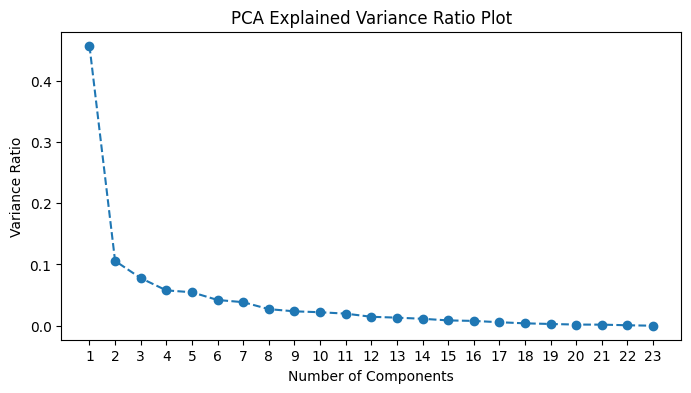

In [ ]:
def perform_pca_and_plot(data):
    # Standardizing the features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Performing PCA without reducing dimensionality to retain all components
    pca = PCA()
    pca.fit(data_scaled)

    # Calculating the explained variance ratio for each component
    explained_variance_ratio = pca.explained_variance_ratio_

    # Plotting the Scree Plot
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
    plt.title('PCA Explained Variance Ratio Plot')
    plt.xlabel('Number of Components')
    plt.ylabel('Variance Ratio')
    plt.xticks(range(1, len(explained_variance_ratio) + 1))
    plt.show()

# Assuming 'data' is your training dataset and 'higgs_test' is your test dataset
training_data = df_encoded  # Replace 'data' with your actual training data DataFrame
test_data = heloc_test  # Replace 'higgs_test' with your actual test data DataFrame

# Call the function on training and test data
perform_pca_and_plot(training_data)
perform_pca_and_plot(test_data)

In [ ]:
# Define the function to perform PCA
def perform_pca(data, n_components=10):
    # Standardizing the features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Performing PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data_scaled)

    # Creating a DataFrame with principal components
    column_names = [f'PC{i+1}' for i in range(n_components)]
    pca_df = pd.DataFrame(data=principal_components, columns=column_names)

    # Examining the explained variance
    explained_variance = pca.explained_variance_ratio_
    total_explained_variance = explained_variance.sum()  # Summing the explained variance

    print("Explained Variance per Component: ", explained_variance)
    print("Total Explained Variance: ", total_explained_variance)
    print(pca_df.head())

    return pca_df

#drop dependent variable for training data


# Assuming 'data' is your training dataset and 'higgs_test' is your test dataset
training_data = df_encoded.drop('RiskPerformance_Good', axis=1)  # Dropping the 'label_bin' column
test_data = heloc_test  # Replace 'higgs_test' with your actual test data DataFrame

# Call the function and store the results
training_data_PCA = perform_pca(training_data, n_components=10)
test_data_PCA = perform_pca(test_data, n_components=10)

Explained Variance per Component:  [0.46651399 0.09393057 0.07808679 0.05785037 0.05212613 0.04399759
 0.03867383 0.02739282 0.02608185 0.0231012 ]
Total Explained Variance:  0.9077551503044361
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  -1.267941 -0.308891 -2.149210 -0.649740  0.965904  0.225861  1.103369   
1  -1.128697  0.036480 -0.517860 -0.590103  0.040314 -1.238859  0.361056   
2  -0.298173 -2.743095  1.318464  0.718644  0.651754 -0.238381  0.788041   
3  12.787635 -0.506013 -0.897112  0.103533 -0.095364 -0.145841  0.143003   
4  -1.463198 -0.355298 -1.197910 -1.822186 -0.578826 -1.092103  0.505435   

        PC8       PC9      PC10  
0 -0.662320  0.795391  0.383547  
1 -0.463460 -0.791864  0.468555  
2 -0.355356 -0.005892  0.426171  
3  0.274711 -0.022952  0.042945  
4 -0.460961  0.301709 -0.311308  
Explained Variance per Component:  [0.45681209 0.10582901 0.07775896 0.05778375 0.05469152 0.04209433
 0.03853496 0.02716172 0.02359751 0.0221095

In [ ]:
merged_df_train = pd.concat([training_data_PCA, df_encoded['RiskPerformance_Good'].reset_index(drop=True)], axis=1)
merged_df_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,RiskPerformance_Good
0,-1.267941,-0.308891,-2.149210,-0.649740,0.965904,0.225861,1.103369,-0.662320,0.795391,0.383547,0
1,-1.128697,0.036480,-0.517860,-0.590103,0.040314,-1.238859,0.361056,-0.463460,-0.791864,0.468555,0
2,-0.298173,-2.743095,1.318464,0.718644,0.651754,-0.238381,0.788041,-0.355356,-0.005892,0.426171,0
3,12.787635,-0.506013,-0.897112,0.103533,-0.095364,-0.145841,0.143003,0.274711,-0.022952,0.042945,0
4,-1.463198,-0.355298,-1.197910,-1.822186,-0.578826,-1.092103,0.505435,-0.460961,0.301709,-0.311308,0
...,...,...,...,...,...,...,...,...,...,...,...
9408,-0.320896,-1.882482,0.493483,0.034503,-0.036399,-0.906757,1.144689,-0.528616,0.515325,0.021406,0
9409,-2.154196,1.280925,-1.588833,-0.676445,-0.210262,-0.416663,0.717594,0.749443,-1.231886,0.412344,0
9410,-0.482619,-0.143183,-0.125395,-1.055202,0.733918,-0.268191,-0.024233,-0.400956,0.111820,0.474664,1
9411,-0.709256,-0.997170,-0.204531,-0.687022,-0.697843,1.352429,-0.772387,-0.990483,0.497983,0.493445,0


PyTorch DL

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Extract the class labels (dependent variable) and features (independent variables)
Y = torch.tensor(df_encoded['RiskPerformance_Good'].values, dtype=torch.float32)
X = torch.tensor(df_encoded.drop('RiskPerformance_Good', axis=1).values, dtype=torch.float32)

# Split the dataset into training and testing sets
# You can choose a different split ratio if needed
split_ratio = 0.8
split_idx = int(len(df_encoded) * split_ratio)
X_train, X_test = X[:split_idx], X[split_idx:]
Y_train, Y_test = Y[:split_idx], Y[split_idx:]

# Define a neural network model
class HiggsClassifier(nn.Module):
    def __init__(self, input_size):
        super(HiggsClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Input size should match the number of features
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)  # Output size is 1 for binary classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return torch.sigmoid(x)

# Create an instance of the model
model = HiggsClassifier(input_size=X.shape[1])

# Define a loss function and an optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # You can adjust the learning rate

# Create DataLoader objects for training and testing
train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(X_test, Y_test)
test_loader = DataLoader(test_dataset, batch_size=64)

# Training loop
num_epochs = 10  # You can adjust the number of epochs
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

    # Print the training loss for each epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}] Loss: {loss.item()}')

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs >= 0.5).float()  # Convert to binary predictions
        total += labels.size(0)
        correct += (predicted == labels.unsqueeze(1)).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {100 * accuracy:.2f}%')

Epoch [1/10] Loss: 0.6498461961746216
Epoch [2/10] Loss: 0.48025792837142944
Epoch [3/10] Loss: 0.550794780254364
Epoch [4/10] Loss: 0.6329503655433655
Epoch [5/10] Loss: 0.5148290395736694
Epoch [6/10] Loss: 0.6430463194847107
Epoch [7/10] Loss: 0.6571966409683228
Epoch [8/10] Loss: 0.6563584208488464
Epoch [9/10] Loss: 0.6060304641723633
Epoch [10/10] Loss: 0.6633304357528687
Test Accuracy: 66.22%


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Extract the class labels (dependent variable) and features (independent variables)
Y = torch.tensor(df_encoded['RiskPerformance_Good'].values, dtype=torch.float32)
X = torch.tensor(df_encoded.drop(columns=['RiskPerformance_Good']).values, dtype=torch.float32)

# Define a neural network model
class HiggsClassifier(nn.Module):
    def __init__(self, input_size):
        super(HiggsClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Input size should match the number of features
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)  # Output size is 1 for binary classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return torch.sigmoid(x)

# Hyperparameters
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Cross-validation setup
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, Y)):
    print(f'Fold {fold + 1}/{num_folds}')

    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]

    # Create DataLoader objects for training and testing
    train_dataset = TensorDataset(X_train, Y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_dataset = TensorDataset(X_test, Y_test)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    # Create an instance of the model
    model = HiggsClassifier(input_size=X.shape[1])

    # Define a loss function and an optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = (outputs >= 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels.unsqueeze(1)).sum().item()

    accuracy = correct / total
    print(f'Validation Accuracy: {100 * accuracy:.2f}%')
    fold_accuracies.append(accuracy)

# Calculate and print the average accuracy across folds
average_accuracy = np.mean(fold_accuracies)
print(f'Average Accuracy: {100 * average_accuracy:.2f}%')

Fold 1/5
Validation Accuracy: 69.30%
Fold 2/5
Validation Accuracy: 71.64%
Fold 3/5
Validation Accuracy: 69.68%
Fold 4/5
Validation Accuracy: 70.62%
Fold 5/5
Validation Accuracy: 68.81%
Average Accuracy: 70.01%


In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define hyperparameters to search over
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
num_epochs_list = [10, 20, 30]

# Cross-validation setup
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, Y)):
    print(f'Fold {fold + 1}/{num_folds}')

    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]

    # Initialize variables to store the best hyperparameters and the corresponding highest accuracy
    best_accuracy = 0.0
    best_learning_rate = None
    best_batch_size = None
    best_num_epochs = None

    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            for num_epochs in num_epochs_list:
                # Create DataLoader objects for training and testing
                train_dataset = TensorDataset(X_train, Y_train)
                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                test_dataset = TensorDataset(X_test, Y_test)
                test_loader = DataLoader(test_dataset, batch_size=batch_size)

                # Create an instance of the model with the current hyperparameters
                model = HiggsClassifier(input_size=X.shape[1])
                optimizer = optim.Adam(model.parameters(), lr=learning_rate)

                # Training loop with the current hyperparameters
                for epoch in range(num_epochs):
                    model.train()
                    for inputs, labels in train_loader:
                        optimizer.zero_grad()
                        outputs = model(inputs)
                        loss = criterion(outputs, labels.unsqueeze(1))
                        loss.backward()
                        optimizer.step()

                # Evaluation
                model.eval()
                correct = 0
                total = 0
                with torch.no_grad():
                    for inputs, labels in test_loader:
                        outputs = model(inputs)
                        predicted = (outputs >= 0.5).float()
                        total += labels.size(0)
                        correct += (predicted == labels.unsqueeze(1)).sum().item()

                accuracy = correct / total

                # Check if the current hyperparameters result in a higher accuracy
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_learning_rate = learning_rate
                    best_batch_size = batch_size
                    best_num_epochs = num_epochs

    print("Best Hyperparameters:")
    print("Learning Rate:", best_learning_rate)
    print("Batch Size:", best_batch_size)
    print("Number of Epochs:", best_num_epochs)
    print(f'Validation Accuracy: {100 * best_accuracy:.2f}%')
    fold_accuracies.append(best_accuracy)

# Calculate and print the average accuracy across folds
average_accuracy = np.mean(fold_accuracies)
print(f'Average Accuracy: {100 * average_accuracy:.2f}%')


Fold 1/5
Best Hyperparameters:
Learning Rate: 0.01
Batch Size: 32
Number of Epochs: 10
Validation Accuracy: 70.21%
Fold 2/5
Best Hyperparameters:
Learning Rate: 0.001
Batch Size: 128
Number of Epochs: 10
Validation Accuracy: 73.39%
Fold 3/5
Best Hyperparameters:
Learning Rate: 0.001
Batch Size: 32
Number of Epochs: 30
Validation Accuracy: 71.91%
Fold 4/5
Best Hyperparameters:
Learning Rate: 0.01
Batch Size: 32
Number of Epochs: 20
Validation Accuracy: 71.09%
Fold 5/5
Best Hyperparameters:
Learning Rate: 0.01
Batch Size: 32
Number of Epochs: 20
Validation Accuracy: 71.79%
Average Accuracy: 71.68%
